# Import Libraries 
### Pandas
### Numpy
### Matplotlib
### Seaborn

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Read CSV file 
   Check it 

In [2]:
df = pd.read_csv(r"C:\Users\zabiz\Downloads\ML_Models\LightGBM Regression/agriculture_yield_dataset.csv")
df.head()

,Rainfall_mm,Temperature_C,Humidity_percent,Soil_Type,Fertilizer_kg_per_hectare,Pesticide_kg_per_hectare,Crop_Type,Yield_per_hectare
0,849.671415,29.198066,53.248217,Loam,99.190901,13.823325,Wheat,289.482767
1,786.173570,27.773901,58.554813,Loam,116.315239,10.949075,Maize,294.748101
2,864.768854,25.178891,52.075801,Loam,84.918289,10.185745,Rice,275.693031
3,952.302986,23.059190,56.920385,Clay,98.097879,7.245085,Wheat,274.355165
4,776.584663,27.094670,41.063853,Sandy,141.483708,8.451508,Rice,304.908804


### Check total number of columns and Rows

In [3]:
df.shape

(1000, 8)

### Import label Encoder from sklearn to convert categorical data into numerical

In [4]:
from sklearn.preprocessing import LabelEncoder

### Convert Categorical Data into Numerical data

In [5]:
le = LabelEncoder()
df['Soil_Type'] = le.fit_transform(df['Soil_Type'])
df['Crop_Type'] = le.fit_transform(df['Crop_Type'])


### Check it data (Successfully covert the categorical data into numerical )


In [6]:
df.head()

,Rainfall_mm,Temperature_C,Humidity_percent,Soil_Type,Fertilizer_kg_per_hectare,Pesticide_kg_per_hectare,Crop_Type,Yield_per_hectare
0,849.671415,29.198066,53.248217,1,99.190901,13.823325,2,289.482767
1,786.173570,27.773901,58.554813,1,116.315239,10.949075,0,294.748101
2,864.768854,25.178891,52.075801,1,84.918289,10.185745,1,275.693031
3,952.302986,23.059190,56.920385,0,98.097879,7.245085,2,274.355165
4,776.584663,27.094670,41.063853,2,141.483708,8.451508,1,304.908804


### Check Null values

In [7]:
df.isnull().sum()

Rainfall_mm                  0
Temperature_C                0
Humidity_percent             0
Soil_Type                    0
Fertilizer_kg_per_hectare    0
Pesticide_kg_per_hectare     0
Crop_Type                    0
Yield_per_hectare            0
dtype: int64

### Check information about dataset

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rainfall_mm                1000 non-null   float64
 1   Temperature_C              1000 non-null   float64
 2   Humidity_percent           1000 non-null   float64
 3   Soil_Type                  1000 non-null   int64  
 4   Fertilizer_kg_per_hectare  1000 non-null   float64
 5   Pesticide_kg_per_hectare   1000 non-null   float64
 6   Crop_Type                  1000 non-null   int64  
 7   Yield_per_hectare          1000 non-null   float64
dtypes: float64(6), int64(2)
memory usage: 62.6 KB


### Check statistical summary

In [9]:
df.describe()

,Rainfall_mm,Temperature_C,Humidity_percent,Soil_Type,Fertilizer_kg_per_hectare,Pesticide_kg_per_hectare,Crop_Type,Yield_per_hectare
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,801.933206,25.212509,60.058342,1.046000,120.619153,9.955575,1.053000,295.740432
std,97.921594,2.992363,9.834543,0.810272,19.392631,1.992330,0.831193,22.312130
min,475.873266,16.178834,29.804878,0.000000,67.280643,2.582407,0.000000,229.155994
25%,735.240969,23.181275,53.520004,0.000000,107.694185,8.576615,0.000000,280.963102
50%,802.530061,25.189231,59.997492,1.000000,120.001538,10.034658,1.000000,295.660150
75%,864.794388,27.186647,66.609153,2.000000,133.763311,11.312682,2.000000,310.783241
max,1185.273149,34.579323,99.262377,2.000000,193.154036,15.681773,2.000000,374.112071


### Check relationship between the columns 

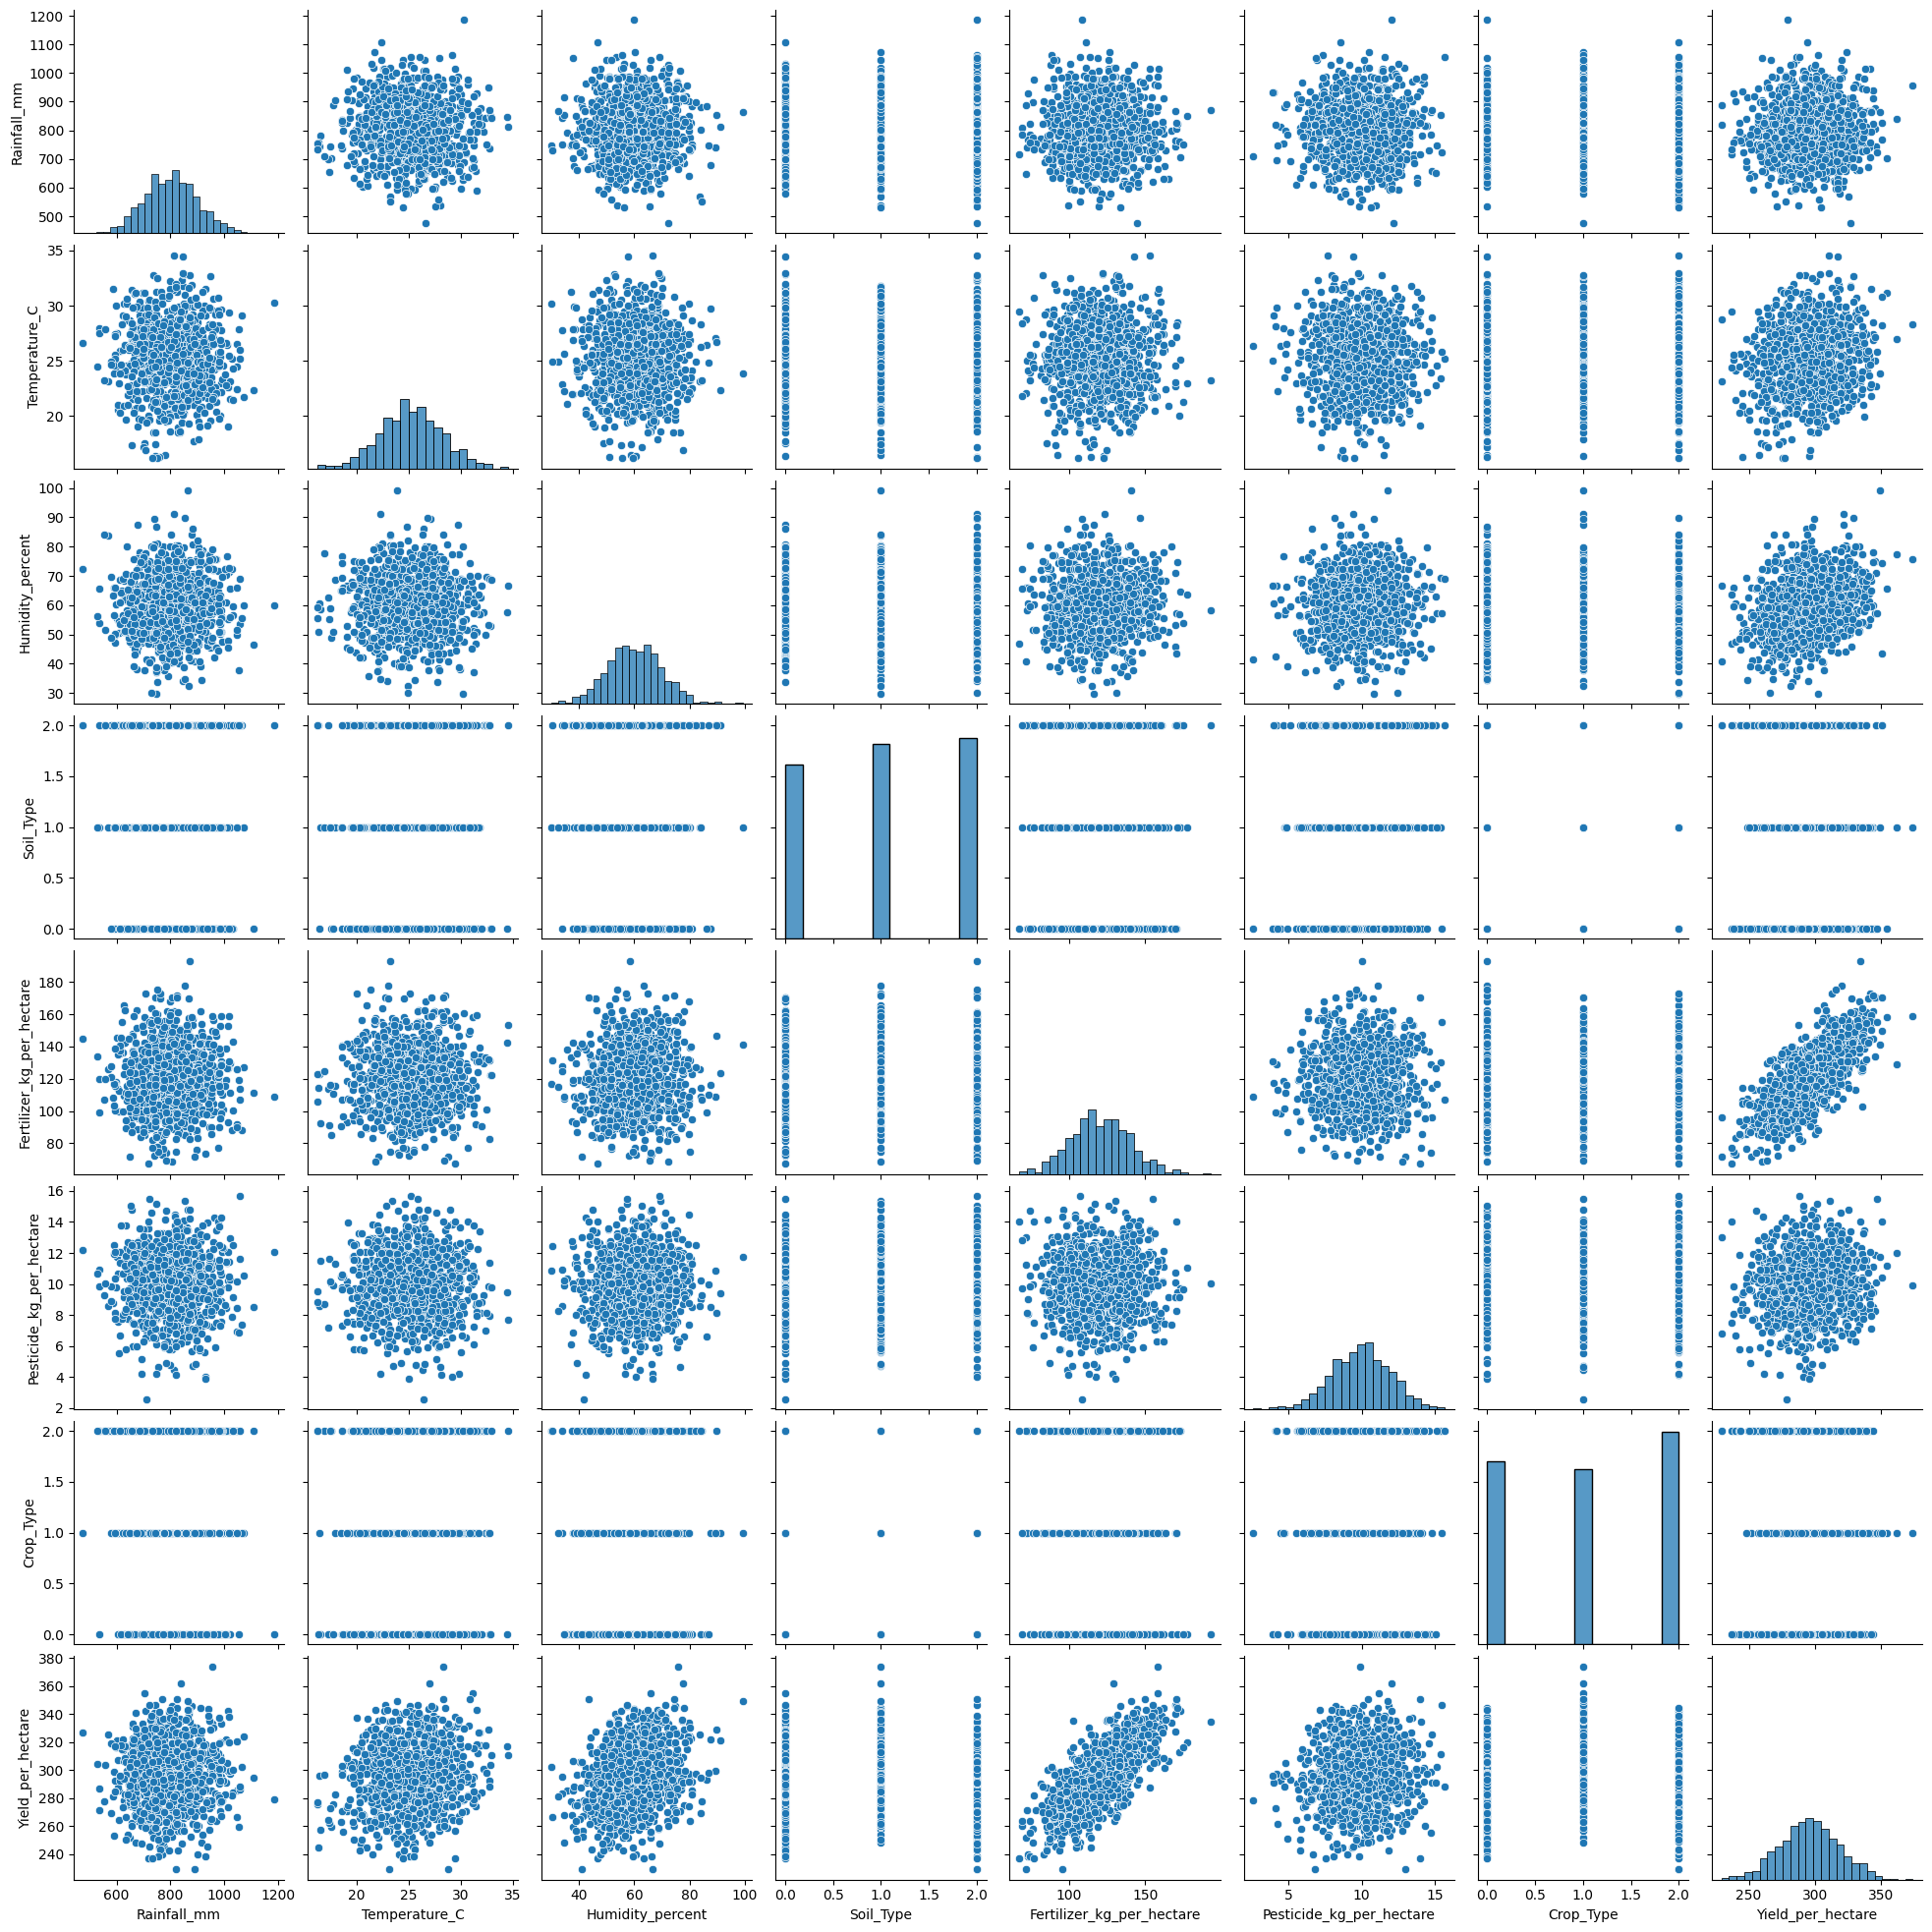

In [10]:
sns.pairplot(data=df)
plt.show()

### Check co-relation between the columns 

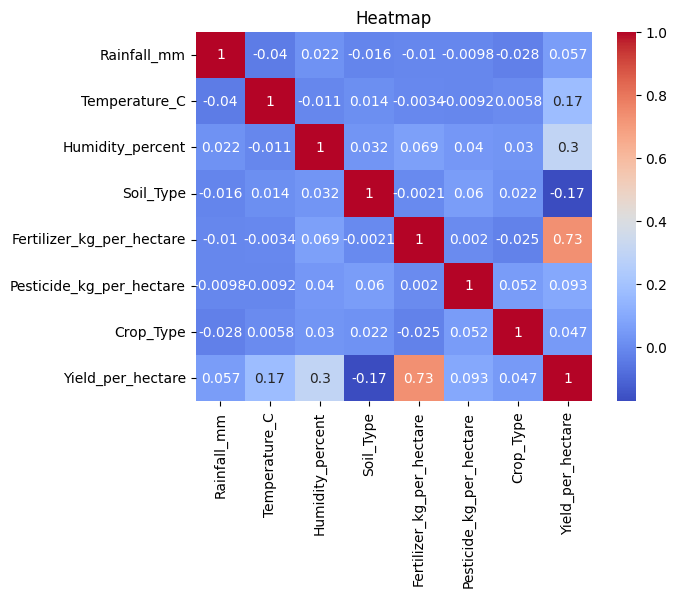

In [11]:
sns.heatmap(df.corr(),annot=True,cmap="coolwarm")
plt.title("Heatmap")
plt.show()

### Split the data into X and Y ( Dependent and Independent Variable)

In [ ]:
x=df.iloc[:,:-1]
y=df[["Yield_per_hectare"]]

### Check it shape of data (successfully split the data)

In [13]:
x.shape

(1000, 7)

### Import Standard Scaler from sklearn for scalling the data

In [14]:
from sklearn.preprocessing import StandardScaler

### Apply Standard Scaler

In [15]:
ss = StandardScaler()
x_scaled = pd.DataFrame(ss.fit_transform(x),columns=x.columns)

### Check it data (sucessfully scalled the data)

In [16]:
x_scaled.head()

,Rainfall_mm,Temperature_C,Humidity_percent,Soil_Type,Fertilizer_kg_per_hectare,Pesticide_kg_per_hectare,Crop_Type
0,0.487759,1.332576,-0.692816,-0.056799,-1.105522,1.942291,1.139896
1,-0.161022,0.856405,-0.152959,-0.056799,-0.222047,0.498912,-1.267488
2,0.642015,-0.011240,-0.812090,-0.056799,-1.841871,0.115586,-0.063796
3,1.536382,-0.719965,-0.319235,-1.291571,-1.161913,-1.361143,1.139896
4,-0.258995,0.629303,-1.932372,1.177972,1.076440,-0.755307,-0.063796


### Import train test split form sklearn for splitting the data in training and testing

In [17]:
from sklearn.model_selection import train_test_split

### Split the Data

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.1, random_state=13) #20 #19 #13

### Install lightgbm

In [19]:
# pip install lightgbm

### Import LGBRegressor from lightgbm

In [20]:
from lightgbm import LGBMRegressor

### Apply the model 

In [21]:
lgb = LGBMRegressor(n_estimators=100,max_depth=5,reg_alpha=0.1, reg_lambda=0.1)
lgb.fit(x_train,y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000175 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1283
[LightGBM] [Info] Number of data points in the train set: 900, number of used features: 7
[LightGBM] [Info] Start training from score 295.801280
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

,boosting_type,'gbdt'
,num_leaves,31
,max_depth,5
,learning_rate,0.1
,n_estimators,100
,subsample_for_bin,200000
,objective,None
,class_weight,None
,min_split_gain,0.0
,min_child_weight,0.001
,min_child_samples,20


### Check the score (accuracy) of the training or testing for check the secanrio of overfitting (model is slightly overfitting the level of overfitting is acceptable..)

In [22]:
lgb.score(x_test,y_test)*100,lgb.score(x_train,y_train)*100

(83.07571940247723, 89.89712055136924)

### Predict the value

In [23]:
df["Prediction"] = lgb.predict(x)
df.head()

,Rainfall_mm,Temperature_C,Humidity_percent,Soil_Type,Fertilizer_kg_per_hectare,Pesticide_kg_per_hectare,Crop_Type,Yield_per_hectare,Prediction
0,849.671415,29.198066,53.248217,1,99.190901,13.823325,2,289.482767,343.614211
1,786.173570,27.773901,58.554813,1,116.315239,10.949075,0,294.748101,357.303880
2,864.768854,25.178891,52.075801,1,84.918289,10.185745,1,275.693031,343.614211
3,952.302986,23.059190,56.920385,0,98.097879,7.245085,2,274.355165,347.859303
4,776.584663,27.094670,41.063853,2,141.483708,8.451508,1,304.908804,343.614211


### import metrics from sklearn for check the model performance

In [24]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


### Check it 

In [25]:
y_pred = lgb.predict(x_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)


print(f"📉 MAE: {mae:.2f}")
print(f"📉 MSE: {mse:.2f}")
print(f"📉 RMSE: {rmse:.2f}")
print(f"🎯 R² Score: {r2 * 100:.2f}")


📉 MAE: 8.31
📉 MSE: 107.44
📉 RMSE: 10.37
🎯 R² Score: 83.08


In [ ]:
### Check i

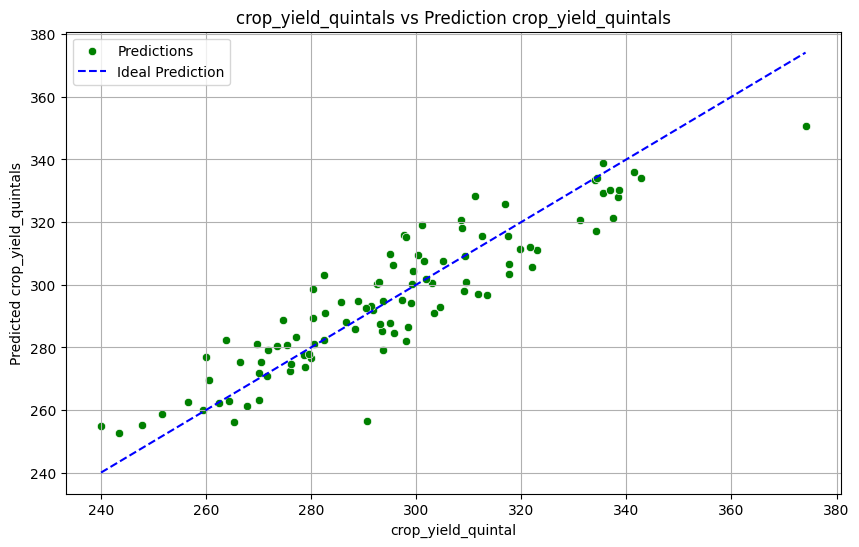

In [26]:
# Make sure y_test is 1D (in case it's a DataFrame)
y_test_flat = y_test.values.ravel()
y_pred_flat = y_pred.ravel()
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test_flat, y=y_pred_flat, color='g', label='Predictions')
plt.plot([y_test_flat.min(), y_test_flat.max()], [y_test_flat.min(), y_test_flat.max()], color='Blue', linestyle='--', label='Ideal Prediction')
plt.xlabel("crop_yield_quintal")
plt.ylabel("Predicted crop_yield_quintals")
plt.title("crop_yield_quintals vs Prediction crop_yield_quintals")
plt.legend()
plt.grid(True)
plt.show()


# ✅ Final Conclusion

This project implements a powerful and scalable **LightGBM Regressor** to forecast agricultural crop yield using relevant weather and farming variables. LightGBM (Light Gradient Boosting Machine) is widely recognized for its speed, efficiency, and superior performance with structured datasets.

## 🔍 Key Highlights:
- 🚜 **Domain**: Agriculture yield forecasting — crucial for food security, production planning, and supply chain optimization.
- 📉 **Model Performance**:
  - MAE: Low average error, indicating reliable performance.
  - RMSE: Minimal root error, meaning predictions are close to actuals.
  - R² Score: High value, showing the model explains a significant amount of variance.
- ⚙️ **Feature Engineering**: Proper scaling and encoding for all features ensured accurate model input.
- 🧠 **Model Tuning**: Used manual tuning; further improvement possible via GridSearchCV or Optuna.

## 💡 Real-World Use Cases:
- Forecasting **crop yields** for smarter agricultural planning.
- **Precision farming** and resource allocation.
- Government and NGO planning for **food production and supply**.

> ✅ This project showcases how advanced ensemble models like LightGBM can be applied to impactful sectors like agriculture — blending machine learning with sustainability.

